In [1]:
from sensor_core import SensorManager
from sensor_core import strg_manager
from sensor_core import ser_manager

In [2]:
# Find available serial ports
ser_manager.find_serial()

['/dev/ttyACM0']

In [ ]:
# USER DEFINED PARAMS
ser_channel_key = ["red", "infrared", "violet"]                    # Names of serial channels
plot_channel_key = [["red", "infrared", "violet"]]                 # Names and gridplot arrangement of plot channels
commport = '/dev/ttyACM0'                                          # Name of comm port
baudrate = 115200                                                  # bits/second
window_size = 1                                                    # Number of points to acquire before updating plot

In [ ]:
# Instantiate Sensor Manager class
sm = SensorManager(ser_channel_key=ser_channel_key,
                   plot_channel_key=plot_channel_key,
                   commport=commport, 
                   baudrate=baudrate, 
                   window_size = 1)

In [ ]:
# Create 'update process' to handle acquired data
p1 = sm.update_data_process(save_data=True, filepath = "./serial_db.sqlite3")
plot = sm.setup_plot()

In [ ]:
# Start update process, start plotting process
## Recommended to use in-built start_process function to avoid Windows OS issues
sm.start_process(p1)
plot.add_animations(sm.online_grid_plot_data)

In [ ]:
# Show plot
plot.show()

In [ ]:
# Dynamically Update Parameters (window size only)
sm.update_params(window_size=1)

In [ ]:
# To load channel data using Storage Manager
red = strg_manager.StorageManager.load_serial_channel(key="red",
                                                      filepath="./serial_db.sqlite3")

In [5]:
# You can use the database object to load data from other keys within the same database
## Example using a sqlite3 file
database = strg_manager.StorageManager.load_serial_database(filepath="./serial_db.sqlite3")
with database:
    now = database['datetime']
    red = database['red']
    ir = database['infrared']
    violet = database['violet']

In [9]:
now

array([datetime.datetime(2023, 11, 16, 2, 37, 53, 597692),
       datetime.datetime(2023, 11, 16, 2, 37, 56, 516367),
       datetime.datetime(2023, 11, 16, 2, 37, 59, 438993),
       datetime.datetime(2023, 11, 16, 2, 38, 2, 491279),
       datetime.datetime(2023, 11, 16, 2, 38, 5, 518758)], dtype=object)

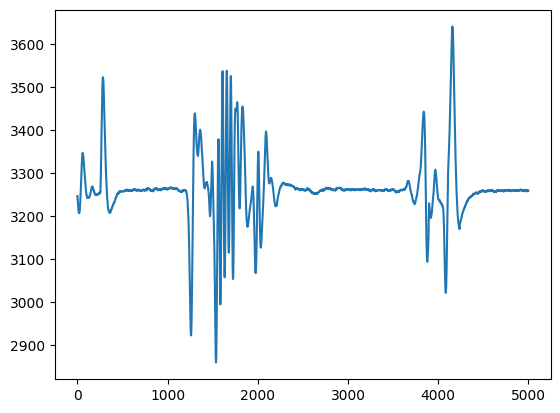

In [8]:
import matplotlib.pyplot as plt
plt.plot(violet)